In [1]:
from STRRunner import STRRunner
import pdblp
import pandas as pd
import pdblp
spx = STRRunner(2016,2024, 'SPX Index')

(CVXPY) Nov 24 11:10:04 AM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')
This script pulls data from Bloomberg and saves it. Using this script often may result in hitting your data limit.
 When you are done using the script, make sure to delete any files saved. As we are not allowed to store Bloomberg data.


In [2]:
spx.generate_schedule()
spx.retrieve_index_constituents()
spx.fetch_relevant_data()
spx.fetch_prices()

Found a csv at SPX Index/constituents.csv not pulling again as you will DEFINITELY run out of data at some point. If you want to change. Run the reset() method
Found a pickle at SPX Index/constituent_data.pkl not pulling again as you will DEFINITELY run out of data at some point. If you want to change. Run the reset() method
Found a csv at SPX Index/prices.csv not pulling again as you will DEFINITELY run out of data at some point. If you want to change. Run the reset() method


In [16]:
import itertools
import pandas as pd
import numpy as np

def grid_search(spx, beta_limits, sector_limits, max_weights, log):
    """
    Perform a grid search to find the best combination of beta_limit, sector_limit, and max_weight.

    Parameters:
    - spx: The STRRunner instance.
    - beta_limits: List of beta limit values to test.
    - sector_limits: List of sector limit values to test.
    - max_weights: List of max weight values to test.

    Returns:
    - results: A DataFrame containing all combinations and their corresponding final cumulative returns.
    """
    # Store results
    results = []

    # Generate all combinations of the parameters
    param_combinations = itertools.product(beta_limits, sector_limits, max_weights, log)

    for beta_limit, sector_limit, max_weight, log in param_combinations:
        print(f"Testing: beta_limit={beta_limit}, sector_limit={sector_limit}, max_weight={max_weight}, log={log}")

        # Run the portfolio creation and backtest
        spx.create_portfolios(
            beta_range=(-beta_limit, beta_limit),
            sector_range=(-sector_limit, sector_limit),
            max_weight=max_weight,
            log=log
        )
        spx.run_backtest()

        # Get the final cumulative return
        final_cumulative_return = spx.cumulative_strategy_returns.iloc[-1]
        sharpe = spx.strategy_returns.mean()*252 / (spx.strategy_returns.std() * np.sqrt(252))
        print(f"Result: {sharpe}")

        # Store the results
        results.append({
            "beta_limit": beta_limit,
            "sector_limit": sector_limit,
            "max_weight": max_weight,
            "log" : log,
            "final_cumulative_return": final_cumulative_return,
            "sharpe" : sharpe
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [17]:
# Define ranges for grid search
beta_limits = [0.05, 0.1]
sector_limits = [0.05, 0.1, 0.2]
max_weights = [0.02, 0.025, 0.03]
log = [True, False]

# Perform grid search
results = grid_search(spx, beta_limits, sector_limits, max_weights, log)

Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.02, log=True


100%|██████████| 36/36 [00:03<00:00,  9.11it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.018732376633828658
Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.02, log=False


100%|██████████| 36/36 [00:05<00:00,  7.10it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.061556947646265556
Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 28.90it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.029371875993926357
Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 26.18it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.1575449270046548
Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.03, log=True


100%|██████████| 36/36 [00:04<00:00,  7.75it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.12432286876909188
Testing: beta_limit=0.05, sector_limit=0.05, max_weight=0.03, log=False


100%|██████████| 36/36 [00:07<00:00,  4.99it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.03689007986112227
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.02, log=True


100%|██████████| 36/36 [00:01<00:00, 31.07it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.13687382713020527
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.02, log=False


100%|██████████| 36/36 [00:01<00:00, 30.79it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.02943987733025952
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 27.38it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.1500871303039219
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 29.70it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.1766068920756317
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.03, log=True


100%|██████████| 36/36 [00:02<00:00, 12.83it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.12623911141792982
Testing: beta_limit=0.05, sector_limit=0.1, max_weight=0.03, log=False


100%|██████████| 36/36 [00:02<00:00, 13.59it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.13736911954784664
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.02, log=True


100%|██████████| 36/36 [00:01<00:00, 28.17it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.15082229811997494
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.02, log=False


100%|██████████| 36/36 [00:01<00:00, 29.01it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.12105980553389581
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 26.13it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.002409181840182078
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 30.23it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.0739756064136131
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.03, log=True


100%|██████████| 36/36 [00:02<00:00, 15.97it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.11902010318896633
Testing: beta_limit=0.05, sector_limit=0.2, max_weight=0.03, log=False


100%|██████████| 36/36 [00:01<00:00, 26.07it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.2740918479200377
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.02, log=True


100%|██████████| 36/36 [00:04<00:00,  7.49it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.036235490419458186
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.02, log=False


100%|██████████| 36/36 [00:04<00:00,  7.56it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.019734614504308138
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 19.34it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.020798133937107353
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 32.46it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.1671018434926971
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.03, log=True


100%|██████████| 36/36 [00:03<00:00,  9.19it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.14909010766069933
Testing: beta_limit=0.1, sector_limit=0.05, max_weight=0.03, log=False


100%|██████████| 36/36 [00:06<00:00,  5.76it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.027632420588169233
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.02, log=True


100%|██████████| 36/36 [00:01<00:00, 27.49it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.10197766045620629
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.02, log=False


100%|██████████| 36/36 [00:01<00:00, 31.75it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.051310024099677574
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 21.19it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.13819747301519655
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 26.43it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: 0.033537209317800416
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.03, log=True


100%|██████████| 36/36 [00:02<00:00, 12.48it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.16576221299082639
Testing: beta_limit=0.1, sector_limit=0.1, max_weight=0.03, log=False


100%|██████████| 36/36 [00:02<00:00, 14.58it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.12437699084805286
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.02, log=True


100%|██████████| 36/36 [00:01<00:00, 32.46it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.1407904648056231
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.02, log=False


100%|██████████| 36/36 [00:01<00:00, 34.06it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.13503510974387758
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.025, log=True


100%|██████████| 36/36 [00:01<00:00, 26.05it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.022199114338140723
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.025, log=False


100%|██████████| 36/36 [00:01<00:00, 32.65it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.06003653364186256
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.03, log=True


100%|██████████| 36/36 [00:01<00:00, 21.52it/s]


Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.17068593371957105
Testing: beta_limit=0.1, sector_limit=0.2, max_weight=0.03, log=False


100%|██████████| 36/36 [00:01<00:00, 24.92it/s]

Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).
Result: -0.2891973525764855


In [19]:
spx.create_portfolios(beta_range=(-0.05, 0.05), sector_range=(-0.1,0.1), max_weight=0.025, log=False)

100%|██████████| 36/36 [00:01<00:00, 29.84it/s]

Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).


In [21]:
spx.run_backtest()

<Axes: xlabel='date'>

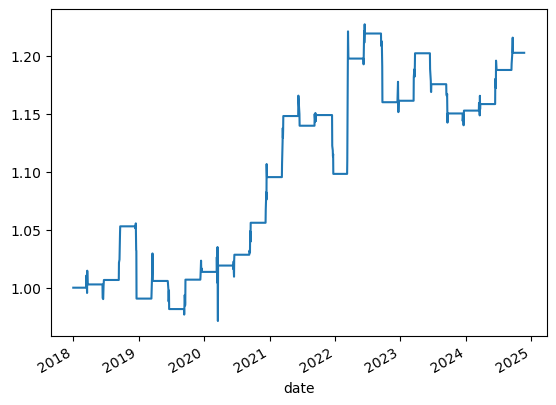

In [27]:
spx.strategy_returns['2018':].mul(3).add(1).cumprod().plot()

In [ ]:
beta_limit = 0.05
sector_limit = 0.05
max_weight = 0.03

spx.create_portfolios(beta_range=(-beta_limit,beta_limit),sector_range=(-sector_limit,sector_limit), max_weight=max_weight)
spx.run_backtest()
result = spx.cumulative_strategy_returns.iloc[-1]

Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Solution Found!
Failed for 2024-12-12 00:00:00. Potentially this is a future date Invalid dimensions (0,).


0.975932274023501

<Axes: xlabel='date'>

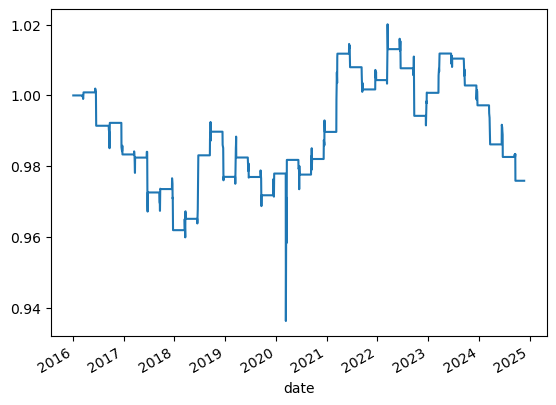

In [25]:
daily_returns = spx.returns.fillna(0)
schedule = spx.schedule
optimized_portfolios = spx.optimized_portfolios